# Imports

In [ ]:
!pip install evaluate
# Install Hugging Face Transformers
!pip install transformers datasets sacrebleu
# Install SentencePiece for BPE tokenization
!pip install sentencepiece

import nltk
nltk.download('wordnet')
# Download wordnet before using METEOR
import nltk
nltk.download('wordnet')

nltk.download('omw-1.4')

In [ ]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
import random
import numpy as np

import time
from nltk.translate import IBMModel1, AlignedSent
from nltk.translate.bleu_score import sentence_bleu
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas as pd
import unicodedata
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


from nltk.translate.meteor_score import meteor_score
import unicodedata
import re
import random
from nltk.translate import IBMModel1, AlignedSent
from nltk.translate.bleu_score import sentence_bleu

import tensorflow as tf

# Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from nltk.translate.meteor_score import meteor_score
import pandas as pd
import unicodedata
import re
import sentencepiece as spm
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, LayerNormalization, MultiHeadAttention
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import time
# Import Libraries
import pandas as pd
import re
import unicodedata
from transformers import MarianMTModel, MarianTokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
import os
os.environ["WANDB_DISABLED"] = "true"

# Import necessary libraries
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

import evaluate
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df = pd.read_csv('eng_-french.csv')
df.head()

,English words/sentences,French words/sentences
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !


In [ ]:
df.rename(columns={'English words/sentences': 'en', 'French words/sentences': 'fr'}, inplace=True)

df_cleaned=df
df_cleaned.head(3)

,en,fr
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !


In [ ]:
df.replace(' ', np.nan, inplace=True)

,en,fr


In [ ]:
class DataExplorer:
    def __init__(self, df):
        self.df = df

    def explore_data(self):
        try:
            print("=" * 50)
            print("                Exploring Data                ")
            print("=" * 50)
            print("Data shape: ", self.df.shape)
            print("-" * 50)
            print("Data columns: ")
            print(self.df.columns)
            print("-" * 50)
            print("Data info: ")
            print(self.df.info())
            print("-" * 50)
            print("Data describe: ")
            print(self.df.describe())
            print("-" * 50)
            print("Number of missing values by column: ")
            print(self.df.isna().sum())
            print("-" * 50)
            print("unlisted Value Counts: ")
            print(self.df['unlisted'].value_counts())
            print("-" * 50)
            print("Duplicates: ")
            num_duplicates = self.df.duplicated().sum()
            print(num_duplicates)
        except:
            pass

explorer_train = DataExplorer(df)
explorer_train.explore_data()

                Exploring Data                
Data shape:  (175621, 2)
--------------------------------------------------
Data columns: 
Index(['en', 'fr'], dtype='object')
--------------------------------------------------
Data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175621 entries, 0 to 175620
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   en      175621 non-null  object
 1   fr      175621 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB
None
--------------------------------------------------
Data describe: 
                                                       en              fr
count                                              175621          175621
unique                                             123100          165975
top     I can't tell you how happy I am that you've co...  C'est bizarre.
freq                                                   32               9
-----------------------

In [ ]:
# Display the shape of the DataFrame
print(f"Shape of the dataset (rows, columns): {df.shape}")

# Count and display the number of null values per column
print("\nNumber of null values per column:")
print(df.isnull().sum())

# Check for duplicate rows and display the count
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# If duplicates exist, display a preview of them (optional)
if duplicate_count > 0:
    print("\nPreview of duplicate rows:")
    print(df[df.duplicated()].head())

# Display basic information about the DataFrame (column types, non-null counts, memory usage)
print("\nDataFrame Info:")
print(df.info())

# Display basic statistics of the numerical columns
print("\nBasic Statistics (numerical columns):")
print(df.describe())

# Display basic statistics of all columns, including non-numerical
print("\nBasic Statistics (all columns):")
print(df.describe(include='all'))

# Preview the first few rows of the DataFrame
print("\nPreview of the first 5 rows:")
print(df.head())

# Display column names for further inspection
print("\nColumn names in the dataset:")
print(df.columns.tolist())


Shape of the dataset (rows, columns): (175621, 2)

Number of null values per column:
en    0
fr    0
dtype: int64

Number of duplicate rows: 0

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175621 entries, 0 to 175620
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   en      175621 non-null  object
 1   fr      175621 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB
None

Basic Statistics (numerical columns):
                                                       en              fr
count                                              175621          175621
unique                                             123100          165975
top     I can't tell you how happy I am that you've co...  C'est bizarre.
freq                                                   32               9

Basic Statistics (all columns):
                                                       en              fr
count                

In [ ]:
#Applying the Word Count Function to Eng & French Columns
data=df

# Function for word count
def word_count(txt):
    if isinstance(txt, str):  # Ensure the value is a string
        return len(txt.split())
    else:
        return 0  # Return 0 for non-string values (e.g., NaN)

# Apply the word count function to both columns
data['Eng_Count'] = data['en'].apply(word_count)
data['Frn_Count'] = data['fr'].apply(word_count)

# Display the first few rows to verify
print(data[['en', 'Eng_Count', 'fr', 'Frn_Count']].head())

     en  Eng_Count          fr  Frn_Count
0   Hi.          1      Salut!          1
1  Run!          1     Cours !          2
2  Run!          1    Courez !          2
3  Who?          1       Qui ?          2
4  Wow!          1  Ça alors !          3


In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("en","fr"))

fig.add_trace(
    go.Histogram(x=data['Eng_Count'],histfunc='sum',opacity =0.8,showlegend=False,text='En'), row=1,col=1)

fig.add_trace(
    go.Histogram(x=data['Frn_Count'],histfunc='sum', opacity =0.8,showlegend=False,text='Fr'), row=1,col=2)

fig.update_layout(height=600, width=800, title_text="Words Distribution")
fig.show()

In [ ]:
# Calculate the number of words in each sentence for English and French
data["English Words in Sentence"] = (
    data["en"].astype(str).str.split().apply(len)
)
data["French Words in Sentence"] = (
    data["fr"].astype(str).str.split().apply(len)
)

fig = px.histogram(
    data,
    x=["English Words in Sentence", "French Words in Sentence"],
    color_discrete_sequence=["#3f384a", "#e04c5f"],  # Colors for English and French
    labels={"variable": "Language", "value": "Words in Sentence"},
    marginal="box",  # Add box plots on the histogram
    barmode="group",  # Grouped bar mode
    height=540,
    width=840,
    title="Word Distribution - English vs French",
)

# Update layout for styling and aesthetics
fig.update_layout(
    font_color="black",  # Replace FONT_COLOR with a string like "black"
    title_font_size=18,
    plot_bgcolor="white",  # Replace BACKGROUND_COLOR with a string like "white"
    paper_bgcolor="white",
    bargap=0.2,  # Adjust gap between bars
    bargroupgap=0.1,  # Adjust gap between groups
    legend=dict(
        orientation="h",
        yanchor="bottom",
        xanchor="right",
        y=1.02,
        x=1,
    ),
    yaxis_title="Count",
    xaxis_title="Words in Sentence",
)

# Display the plot
fig.show()

French sentences have less words than their translation in English.

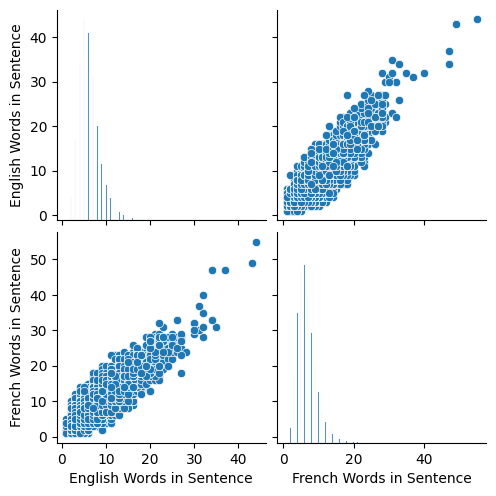

In [ ]:
sns.pairplot(data[['English Words in Sentence', 'French Words in Sentence']])

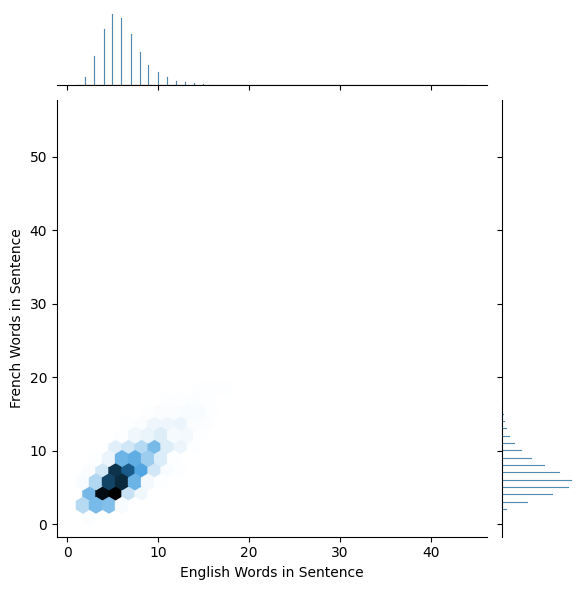

In [ ]:
# Hexbin plot to visualize density
sns.jointplot(x='English Words in Sentence',
              y='French Words in Sentence',
              data=data,
              kind='hex',
              gridsize=30)  # Adjust gridsize for granularity

plt.show()

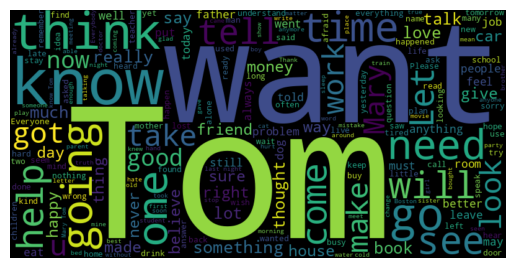

In [ ]:
# Generate WordCloud
wc = WordCloud(width=800, height=400).generate(' '.join(data['en'].astype(str)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

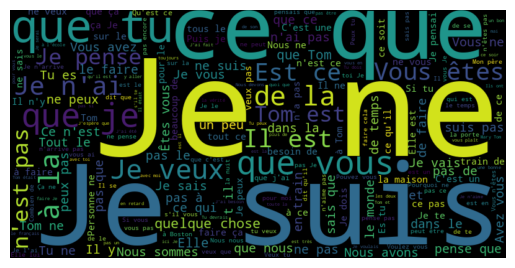

In [ ]:
# Convert to string and fill missing values
wc = WordCloud(width=800, height=400).generate(' '.join(data['fr'].fillna('').astype(str)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.dtypes

,0
en,object
fr,object
Eng_Count,int64
Frn_Count,int64
English Words in Sentence,int64
French Words in Sentence,int64


In [ ]:
# Function to calculate total unique words and total words with repetition per column
def word_counts_summary(df):
    summary = {}
    for column in df.columns:
        # Get all words in the column
        all_words = [word for phrase in df[column].dropna() for word in phrase.split()]
        # Count unique words
        unique_words_count = len(set(all_words))
        # Count total words with repetition
        total_words_count = len(all_words)
        # Add to summary
        summary[column] = {
            'Total Unique Words': unique_words_count,
            'Total Words (with repetition)': total_words_count
        }
    return summary

# Calculate the word counts summary
word_counts = word_counts_summary(df[['en','fr']])

# Display the result
word_counts


{'en': {'Total Unique Words': 27393, 'Total Words (with repetition)': 1082098},
 'fr': {'Total Unique Words': 44918, 'Total Words (with repetition)': 1177832}}

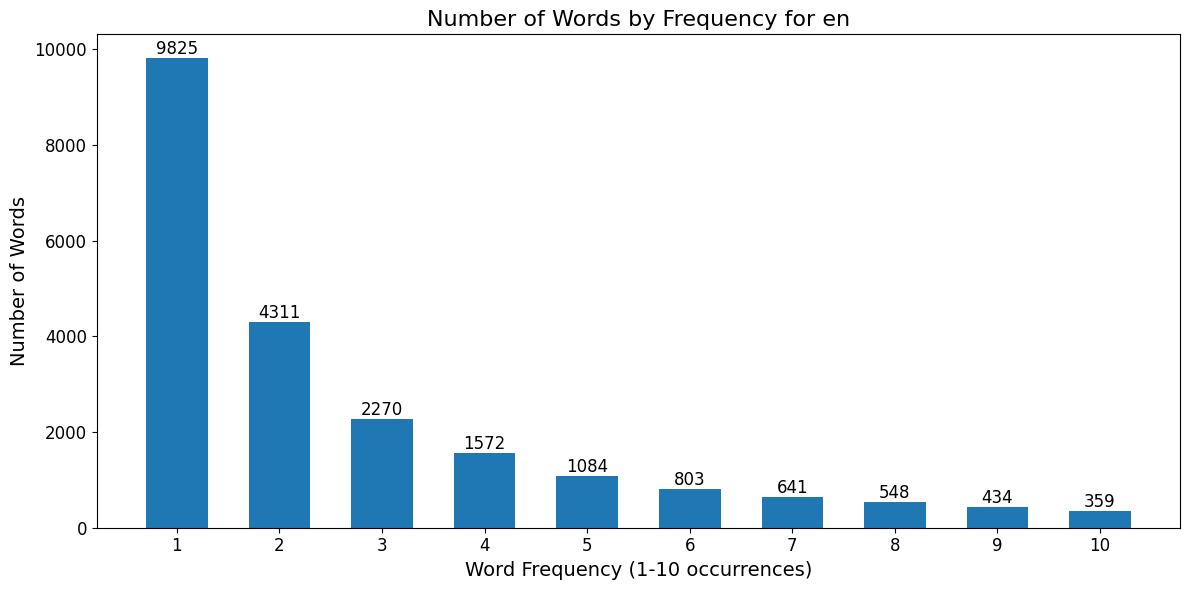

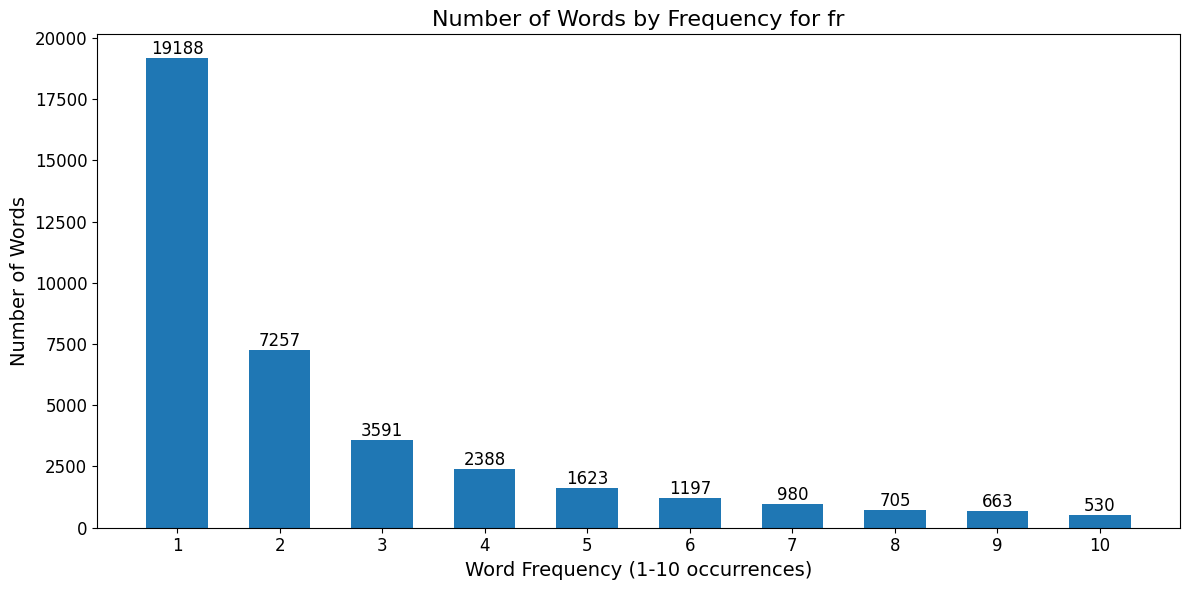

In [ ]:
# Function to plot histogram of word frequencies with larger fonts and numbers on top of columns
def plot_histogram_word_counts_with_labels(df):
    for column in df.columns:
        # Count word frequencies
        all_words = [word for phrase in df[column].dropna() for word in phrase.split()]
        word_counts = Counter(all_words)

        # Count the number of words for each frequency (1 to 10)
        frequency_counts = [list(word_counts.values()).count(i) for i in range(1, 11)]

        # Plot histogram
        plt.figure(figsize=(12, 6))
        bars = plt.bar(range(1, 11), frequency_counts, width=0.6)
        plt.title(f"Number of Words by Frequency for {column}", fontsize=16)
        plt.xlabel("Word Frequency (1-10 occurrences)", fontsize=14)
        plt.ylabel("Number of Words", fontsize=14)
        plt.xticks(range(1, 11), fontsize=12)
        plt.yticks(fontsize=12)

        # Add numbers on top of each bar
        for bar in bars:
            height = bar.get_height()
            if height > 0:  # Only add text if the bar height is greater than 0
                plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                         ha='center', va='bottom', fontsize=12)

        plt.tight_layout()
        plt.show()

# Plot the histograms
plot_histogram_word_counts_with_labels(df[['en','fr']])


In [ ]:
df=df[['en','fr']]

# Pre-processing

## 1. LSTM

### Preprocessing Key Features:
- **Tokenization and Sequencing**: The tokenizer converts words to numerical indices while handling out-of-vocabulary (OOV) words with `<unk>`. Padding ensures uniform sequence length.
- **Special Tokens (`<s>` and `</s>`)**: Start-of-sequence (`<s>`) and end-of-sequence (`</s>`) markers help the LSTM model learn the boundaries of input and output sequences.

### Why This Works:
- **Sequential Nature**: LSTM processes data step-by-step; consistent sequence lengths and special tokens enhance the model's ability to capture dependencies and boundaries.
- **Handling Vocabulary Limitations**: Using a vocabulary size cap (`num_words`) ensures the model focuses on the most common words, reducing memory usage and overfitting.

---

## 2. Statistical Machine Translation (SMT)

### Preprocessing Key Features:
- **Text Cleaning**: Normalization (lowercasing, removing accents) and removal of unwanted characters (HTML tags, URLs, extra spaces) create a clean and consistent corpus.
- **Removing NaN**: Dropping rows with missing values ensures the training data is reliable.

### Why This Works:
- **Data Consistency**: SMT relies on statistical patterns, so clean, normalized data minimizes noise and improves alignment probabilities.
- **Exact Word Matching**: SMT doesn't generalize as effectively as neural models, so consistent text formatting is critical for accurate word alignment.

---

## 3. Byte Pair Encoding (BPE) + Transformer

### Preprocessing Key Features:
- **BPE Vocabulary Creation**: Reduces large vocabularies to manageable sizes by splitting rare words into subword units.
- **SentencePiece Tokenization**: Trained on the corpus to create a consistent vocabulary tailored to the dataset.

### Why This Works:
- **Subword Units**: Transformers handle variable-length sequences. BPE ensures rare words can be represented as combinations of subwords, improving model generalization.
- **Efficient Vocabulary**: BPE balances vocabulary size and representation, reducing memory usage while maintaining expressiveness.
- **Parallel Processing**: Transformers benefit from uniform input sequences with positional encoding.

---

## 4. Pretrained MarianMT

### Preprocessing Key Features:
- **Lowercasing and Normalization**: Standard preprocessing to clean and normalize text for pretrained models.
- **Conversion to Hugging Face Dataset**: Converts data into a format compatible with the MarianMT pipeline.

### Why This Works:
- **Pretrained Embeddings**: MarianMT relies on embeddings trained on standardized data. Consistent preprocessing ensures compatibility and optimal performance.
- **Dataset Preparation**: Hugging Face datasets streamline integration with pretrained transformers, supporting batching and tokenization.


| **Model**          | **Why Preprocessing Fits**                                                                |
|---------------------|------------------------------------------------------------------------------------------|
| **LSTM**           | Sequential tokenization and padding align with the step-by-step processing of LSTMs.     |
| **SMT**            | Focuses on exact text matches; clean, normalized text enhances statistical alignment.     |
| **BPE + Transformer** | Subword units and positional encoding handle complex sequences efficiently.               |
| **MarianMT**       | Preprocessing aligns input with pretrained transformer tokenizers for optimal translation. |


# Modelling

## Seq2Seq

In [ ]:
def preprocess_dataframe(df):
    # Step 1: Drop rows with NaN
    df = df.dropna()

    # Step 2: Lowercase, normalize accents, and remove extra spaces
    def clean_text(text):
        # Lowercase
        text = text.lower()
        # Normalize accents
        text = unicodedata.normalize('NFKC', text)
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove URLs
        text = re.sub(r'http\S+|www\.\S+', '', text)
        # Remove commas
        text = text.replace(',', '')
        return text

    for column in df.columns:
        df[column] = df[column].apply(clean_text)

    # Step 3: Replace out-of-vocabulary words or words appearing once with <unk>
    vocab = {}
    for column in df.columns:
        all_words = [word for phrase in df[column] for word in phrase.split()]
        word_counts = pd.Series(all_words).value_counts()
        vocab[column] = word_counts[word_counts > 1].index

    for column in df.columns:
        df[column] = df[column].apply(
            lambda phrase: ' '.join(
                word if word in vocab[column] else '<unk>' for word in phrase.split()
            )
        )

    # Step 4: Add start-of-sentence (<s>) and end-of-sentence (</s>) tokens
    for column in df.columns:
        df[column] = df[column].apply(lambda x: f"<s> {x} </s>")

    # Step 5: Remove rows with NaN again (in case new NaNs are introduced)
    df = df.dropna()

    return df

# Apply preprocessing to the dataframe
preprocessed_df = preprocess_dataframe(df[['en','fr']])

# Display the resulting dataframe
preprocessed_df

,en,fr
0,<s> hi. </s>,<s> <unk> </s>
1,<s> run! </s>,<s> cours ! </s>
2,<s> run! </s>,<s> courez ! </s>
3,<s> who? </s>,<s> qui ? </s>
4,<s> wow! </s>,<s> ça alors ! </s>
...,...,...
175616,<s> <unk> economics never works said <unk> <un...,<s> « l'économie en partant du haut vers le ba...
175617,<s> a carbon footprint is the amount of carbon...,<s> une empreinte carbone est la somme de poll...
175618,<s> death is something that we're often discou...,<s> la mort est une chose qu'on nous décourage...
175619,<s> since there are usually multiple websites ...,<s> puisqu'il y a de multiples sites web sur c...


In [ ]:
# split data into train (90%) and test set (10%)
train_data, test_data = train_test_split(preprocessed_df[['en','fr']], test_size=0.1, random_state = 0)

In [ ]:
# Preprocessing function
def preprocess_data(data, num_words=10000, max_seq_length=15):
    # Tokenize and sequence English
    tokenizer_en = Tokenizer(num_words=num_words, oov_token="<unk>")
    tokenizer_en.fit_on_texts(data['en'])
    sequences_en = tokenizer_en.texts_to_sequences(data['en'])
    sequences_en = pad_sequences(sequences_en, maxlen=max_seq_length, padding='post')

    # Tokenize and sequence French
    tokenizer_fr = Tokenizer(num_words=num_words, oov_token="<unk>")
    tokenizer_fr.fit_on_texts(data['fr'])

    # Add <s> and </s> to the French tokenizer
    tokenizer_fr.word_index['<s>'] = len(tokenizer_fr.word_index) + 1
    tokenizer_fr.word_index['</s>'] = len(tokenizer_fr.word_index) + 1
    tokenizer_fr.index_word[len(tokenizer_fr.word_index)] = '<s>'
    tokenizer_fr.index_word[len(tokenizer_fr.word_index)] = '</s>'

    # Update sequences to include <s> and </s>
    sequences_fr = tokenizer_fr.texts_to_sequences(data['fr'])
    sequences_fr = [
        [tokenizer_fr.word_index['<s>']] + seq + [tokenizer_fr.word_index['</s>']]
        for seq in sequences_fr
    ]
    sequences_fr = pad_sequences(sequences_fr, maxlen=max_seq_length, padding='post')

    return sequences_en, sequences_fr, tokenizer_en, tokenizer_fr

# Load data and preprocess
train_data, test_data = train_test_split(preprocessed_df[['en', 'fr']], test_size=0.1, random_state=0)
sequences_en, sequences_fr, tokenizer_en, tokenizer_fr = preprocess_data(preprocessed_df)

In [ ]:
# Define Seq2Seq model
def create_seq2seq_model(input_dim, output_dim, embedding_dim=128, latent_dim=256):
    # Encoder
    encoder_inputs = Input(shape=(None,))
    encoder_embedding = Embedding(input_dim, embedding_dim, mask_zero=True)(encoder_inputs)
    encoder_lstm, state_h, state_c = LSTM(latent_dim, return_state=True)(encoder_embedding)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=(None,))
    decoder_embedding = Embedding(output_dim, embedding_dim, mask_zero=True)(decoder_inputs)
    decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
    decoder_dense = Dense(output_dim, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    # Model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    # Encoder Model for Inference
    encoder_model = Model(encoder_inputs, encoder_states)

    # Decoder Model for Inference
    decoder_state_input_h = Input(shape=(latent_dim,))
    decoder_state_input_c = Input(shape=(latent_dim,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

    decoder_embedding2 = Embedding(output_dim, embedding_dim, mask_zero=True)(decoder_inputs)
    decoder_outputs2, state_h2, state_c2 = decoder_lstm(
        decoder_embedding2, initial_state=decoder_states_inputs
    )
    decoder_states2 = [state_h2, state_c2]
    decoder_outputs2 = decoder_dense(decoder_outputs2)

    decoder_model = Model(
        [decoder_inputs] + decoder_states_inputs,
        [decoder_outputs2] + decoder_states2
    )

    return model, encoder_model, decoder_model

# Parameters
input_dim = len(tokenizer_en.word_index) + 1
output_dim = len(tokenizer_fr.word_index) + 1
embedding_dim = 128
latent_dim = 256
batch_size = 64
epochs = 10

# Build Models
model, encoder_model, decoder_model = create_seq2seq_model(input_dim, output_dim, embedding_dim, latent_dim)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(
    [sequences_en, sequences_fr[:, :-1]],
    sequences_fr[:, 1:],
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 57s 21ms/step - accuracy: 0.3323 - loss: 3.9117 - val_accuracy: 0.3315 - val_loss: 4.0441
Epoch 2/10
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.4223 - loss: 2.2534 - val_accuracy: 0.3761 - val_loss: 3.5503
Epoch 3/10
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.4706 - loss: 1.7271 - val_accuracy: 0.4050 - val_loss: 3.2789
Epoch 4/10
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.5084 - loss: 1.3694 - val_accuracy: 0.4226 - val_loss: 3.1555
Epoch 5/10
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.5373 - loss: 1.1162 - val_accuracy: 0.4361 - val_loss: 3.0940
Epoch 6/10
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.5611 - loss: 0.9290 - val_accuracy: 0.4423 - val_loss: 3.0741
Epoch 7/10
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.5791 - loss: 0.7938 - val_accuracy: 0.4470 - val_loss: 3.0843
Epoch 8/10
2470/2470 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.5933 -

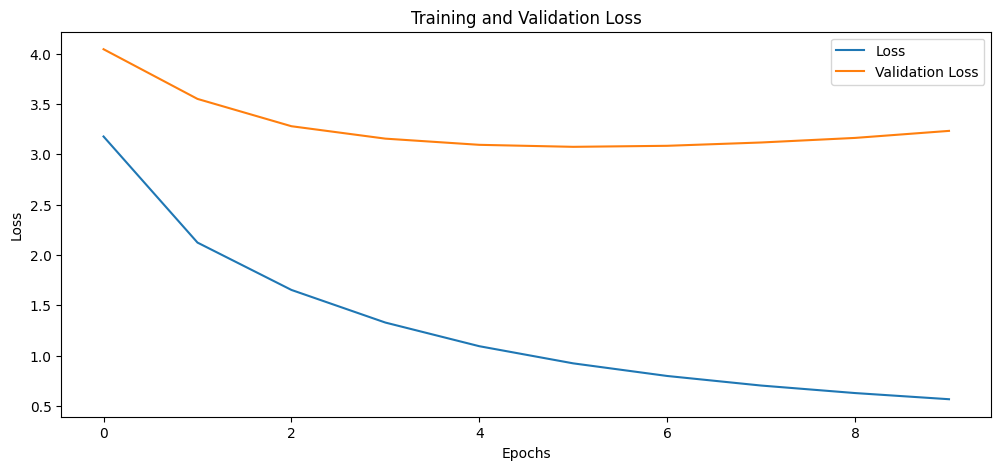

In [ ]:

# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

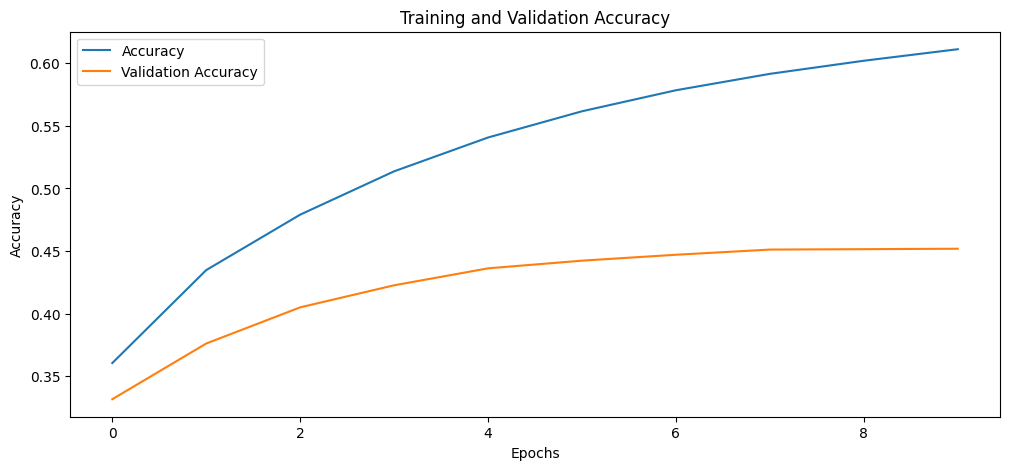

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
def translate_sentence(input_sentence, tokenizer_en, tokenizer_fr, encoder_model, decoder_model, max_len):
    # Tokenize and pad the input sentence
    input_seq = tokenizer_en.texts_to_sequences([input_sentence])
    input_seq = pad_sequences(input_seq, maxlen=max_len, padding='post')

    # Encode the input sequence
    states_value = encoder_model.predict(input_seq, verbose=0)

    # Start decoding
    target_seq = np.array([[tokenizer_fr.word_index['<s>']]])  # Start token
    stop_condition = False
    translated_sentence = []

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value, verbose=0)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tokenizer_fr.index_word.get(sampled_token_index, "<unk>")
        translated_sentence.append(sampled_word)

        if sampled_word == '</s>' or len(translated_sentence) > max_len:
            stop_condition = True

        # Update the target sequence and states
        target_seq = np.array([[sampled_token_index]])
        states_value = [h, c]

    return ' '.join(translated_sentence[:-1])  # Remove the stop token

# Translate random sentences from the test set
for _ in range(5):
    idx = random.randint(0, len(test_data) - 1)
    en_sentence = test_data.iloc[idx]['en']
    fr_sentence = test_data.iloc[idx]['fr']

    translated_sentence = translate_sentence(
        en_sentence, tokenizer_en, tokenizer_fr, encoder_model, decoder_model, sequences_en.shape[1]
    )

    print(f"Original (EN): {en_sentence}")
    print(f"Original (FR): {fr_sentence}")
    print(f"Translation : {translated_sentence}")


Original (EN): <s> it was a very long meeting. </s>
Original (FR): <s> cette réunion était extrêmement longue. </s>
Translation : une un une une une s s s s s s s s s s
Original (EN): <s> did i really do that? </s>
Original (FR): <s> ai-je vraiment fait cela ? </s>
Translation : vraiment vraiment ça ça ça s s s s s s s s s s
Original (EN): <s> she made a lot of spelling mistakes. </s>
Original (FR): <s> elle a fait de nombreuses fautes d'orthographe. </s>
Translation : s à de de de de s s s s s s s s s
Original (EN): <s> how did you end up here? </s>
Original (FR): <s> comment as-tu fini ici ? </s>
Translation : comment comment à que s s s s s s s s s s s
Original (EN): <s> tom is a great teacher. </s>
Original (FR): <s> tom est un bon professeur. </s>
Translation : tom un un un s s s s s s s s s s s


In [ ]:
# Calculate BLEU score for 30 sentences
bleu_scores = []
for _ in range(30):
    # Randomly pick a sentence from the test set
    idx = random.randint(0, len(test_data) - 1)
    en_sentence = test_data.iloc[idx]['en']
    fr_sentence = test_data.iloc[idx]['fr']

    # Translate the English sentence
    translated_sentence = translate_sentence(
        en_sentence, tokenizer_en, tokenizer_fr, encoder_model, decoder_model, sequences_en.shape[1]
    )

    # Prepare reference and candidate for BLEU score
    reference = [fr_sentence.split()]  # Reference should be a list of tokens
    candidate = translated_sentence.split()  # Candidate is the generated translation

    # Calculate BLEU score for this sentence
    bleu_scores.append(sentence_bleu(reference, candidate))

# Output average BLEU score
print(f"Average BLEU Score for 30 sentences: {np.mean(bleu_scores):.4f}")


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning:


The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning:


The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning:


The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()



Average BLEU Score for 30 sentences: 0.0000


In [ ]:
# Calculate METEOR score for 20 sentences
meteor_scores = []
for _ in range(20):
    # Randomly pick a sentence from the test set
    idx = random.randint(0, len(test_data) - 1)
    en_sentence = test_data.iloc[idx]['en']
    fr_sentence = test_data.iloc[idx]['fr']

    # Translate the English sentence
    translated_sentence = translate_sentence(
        en_sentence, tokenizer_en, tokenizer_fr, encoder_model, decoder_model, sequences_en.shape[1]
    )

    # Tokenize reference and hypothesis for METEOR
    reference = fr_sentence.split()  # Tokenize reference
    hypothesis = translated_sentence.split()  # Tokenize hypothesis

    # Calculate METEOR score for this sentence
    meteor_scores.append(meteor_score([reference], hypothesis))

# Output average METEOR score
print(f"Average METEOR Score for 20 sentences: {np.mean(meteor_scores):.4f}")


Average METEOR Score for 20 sentences: 0.0616


The model's performance is defenitly lacking.
Possible factors could be that:

*   Substantial training data is required to learn meaningful patterns, particularly in language translation tasks.
*   Long-term dependency challenges: LSTMs, while better than standard RNNs, still struggle with long-term dependencies, especially in complex sentences.
*   Vocabulary size constraints: Handling out-of-vocabulary (OOV) words with THE UNK may lead to a loss of semantic meaning.
*   Insufficient hyperparameter tuning: Suboptimal hyperparameters (embedding size, number of LSTM units, learning rate) can limit the model's performance.

With the first one being the most critial factor, since this notebok has limited resoures to run.

## Statistical Machine Translation (SMT)

In [ ]:
# Preprocessing
def preprocess_dataframe(df):
    # Step 1: Drop rows with NaN
    df = df.dropna()

    # Step 2: Lowercase, normalize accents, and remove extra spaces
    def clean_text(text):
        text = text.lower()
        text = unicodedata.normalize('NFKC', text)
        text = re.sub(r'\s+', ' ', text).strip()
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'http\S+|www\.\S+', '', text)
        text = text.replace(',', '')
        return text

    for column in df.columns:
        df[column] = df[column].apply(clean_text)

    return df

# Preprocess the dataframe
preprocessed_df = preprocess_dataframe(df)

# Split Data into Training and Testing Sets
train_data, test_data = train_test_split(preprocessed_df[['en', 'fr']], test_size=0.1, random_state=0)


In [ ]:
# Preparing the Data for SMT
def prepare_aligned_sentences(train_data):
    aligned_sentences = []
    for _, row in train_data.iterrows():
        en_words = row['en'].split()
        fr_words = row['fr'].split()
        aligned_sentences.append(AlignedSent(en_words, fr_words))
    return aligned_sentences

aligned_sentences = prepare_aligned_sentences(train_data)

# Train the IBM Model 1 for SMT
ibm_model = IBMModel1(aligned_sentences, 5)

In [ ]:
class IBMModel1WithProgress(IBMModel1):
    def __init__(self, aligned_sents, num_iters, verbose=False):
        self.verbose = verbose
        self.num_iters = num_iters  # Store num_iters for progress tracking
        super().__init__(aligned_sents, num_iters)

    def train(self, sentence_aligned_corpus):
        total_sentences = len(sentence_aligned_corpus)
        for iteration in range(self.num_iters):
            start_time = time.time()
            # Perform one iteration of the EM algorithm
            super().train(sentence_aligned_corpus)
            end_time = time.time()
            if self.verbose:
                print(f"Iteration {iteration + 1}/{self.num_iters} completed in {end_time - start_time:.2f} seconds")
                print(f"Processed {total_sentences} sentence pairs in this iteration.")

# Preparing aligned sentences
aligned_sentences = prepare_aligned_sentences(train_data)

# Train IBM Model 1 with progress tracking
ibm_model = IBMModel1WithProgress(aligned_sentences, num_iters=5, verbose=True)


Iteration 1/5 completed in 12.06 seconds
Processed 158058 sentence pairs in this iteration.
Iteration 2/5 completed in 12.35 seconds
Processed 158058 sentence pairs in this iteration.
Iteration 3/5 completed in 12.20 seconds
Processed 158058 sentence pairs in this iteration.
Iteration 4/5 completed in 12.23 seconds
Processed 158058 sentence pairs in this iteration.
Iteration 5/5 completed in 12.32 seconds
Processed 158058 sentence pairs in this iteration.
Iteration 1/5 completed in 12.28 seconds
Processed 158058 sentence pairs in this iteration.
Iteration 2/5 completed in 12.30 seconds
Processed 158058 sentence pairs in this iteration.
Iteration 3/5 completed in 13.04 seconds
Processed 158058 sentence pairs in this iteration.
Iteration 4/5 completed in 12.29 seconds
Processed 158058 sentence pairs in this iteration.
Iteration 5/5 completed in 12.10 seconds
Processed 158058 sentence pairs in this iteration.
Iteration 1/5 completed in 12.15 seconds
Processed 158058 sentence pairs in this

In [ ]:
# Translate Function
def translate(sentence, model, french_vocab):
    words = sentence.split()
    translation = []
    for word in words:
        if word in model.translation_table:
            # Pick the most probable French word
            translation.append(max(model.translation_table[word], key=model.translation_table[word].get))
        else:
            translation.append("<unk>")  # Out-of-vocabulary words
    return " ".join(translation)

# Testing the Translation on 5 Random Sentences
for _ in range(5):
    idx = random.randint(0, len(test_data) - 1)
    en_sentence = test_data.iloc[idx]['en']
    fr_sentence = test_data.iloc[idx]['fr']
    fr_vocab = [word for row in train_data['fr'] for word in row.split()]

    translated_sentence = translate(en_sentence, ibm_model, fr_vocab)
    print(f"Original (EN): {en_sentence}")
    print(f"Original (FR): {fr_sentence}")
    print(f"Translated (FR): {translated_sentence}")
    print()

Original (EN): tom walks faster than mary.
Original (FR): tom marche plus vite que mary.
Translated (FR): tom quelquefois. vieillissent supérieure maria.

Original (EN): they make a great team.
Original (FR): ils constituent une grande équipe.
Translated (FR): qu'elles confectionner un fameux équipe.

Original (EN): she was about to go out.
Original (FR): elle allait sortir.
Translated (FR): elle était propos à aller éliminé.

Original (EN): i found the book i had long been looking for.
Original (FR): j'ai trouvé le livre que j'ai longtemps cherché.
Translated (FR): je trouvèrent la livre je dut longue fussiez recherche paies.

Original (EN): i want to be pampered.
Original (FR): je veux qu'on me choie.
Translated (FR): je désirent à être choyée.



In [ ]:
# Evaluate BLEU Score for 30 Sentences
bleu_scores = []
for _ in range(30):
    idx = random.randint(0, len(test_data) - 1)
    en_sentence = test_data.iloc[idx]['en']
    fr_sentence = test_data.iloc[idx]['fr'].split()
    fr_vocab = [word for row in train_data['fr'] for word in row.split()]

    translated_sentence = translate(en_sentence, ibm_model, fr_vocab).split()
    bleu_scores.append(sentence_bleu([fr_sentence], translated_sentence))

print(f"Average BLEU Score for 30 sentences: {sum(bleu_scores) / len(bleu_scores)}")

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning:


The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning:


The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning:


The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()



Average BLEU Score for 30 sentences: 0.01693775827182049


In [ ]:
# Function to compute METEOR for 40 random sentences
def compute_average_meteor(test_data, train_data, model, num_sentences=40):
    meteor_scores = []
    sampled_indices = random.sample(range(len(test_data)), num_sentences)  # Randomly sample indices

    for idx in sampled_indices:
        en_sentence = test_data.iloc[idx]['en']
        fr_sentence = test_data.iloc[idx]['fr']
        fr_vocab = [word for row in train_data['fr'] for word in row.split()]

        # Translate the English sentence
        translated_sentence = translate(en_sentence, model, fr_vocab)

        # Compute METEOR score
        meteor = meteor_score([fr_sentence.split()], translated_sentence.split())
        meteor_scores.append(meteor)

    # Compute and return the average METEOR score
    average_meteor = sum(meteor_scores) / len(meteor_scores)
    return average_meteor

# Compute and print the average METEOR score for 40 random sentences
average_meteor_score = compute_average_meteor(test_data, train_data, ibm_model, num_sentences=40)
print(f"Average METEOR Score for 40 sentences: {average_meteor_score:.4f}")


Average METEOR Score for 40 sentences: 0.2085


Although the metrics are low, the translations themselves seem reasonably okay, the metrics do not reflect this since:



*   SMT relies on statistical alignments, which often produce translations that are acceptable at a sentence level but lack fluency and naturalness.
*   Automatic metrics like BLEU or METEOR heavily penalize word order and phrasing differences. SMT tends to generate literal translations that may not align perfectly with reference translations.
*   Limited generalization: SMT does not generalize well to unseen phrases or idiomatic expressions, further impacting metric scores.




## Byte Pair Encoding (BPE) + transformer

In [ ]:
def preprocess_dataframe(df):
    def clean_text(text):
        text = text.lower()
        text = unicodedata.normalize('NFKC', text)
        text = re.sub(r'\s+', ' ', text).strip()
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'http\S+|www\.\S+', '', text)
        text = text.replace(',', '')
        return text

    # Use .loc to modify dataframe explicitly
    for column in df.columns:
        df.loc[:, column] = df[column].apply(clean_text)

    return df

# Preprocess DataFrame
preprocessed_df = preprocess_dataframe(df)


In [ ]:
# Step 1: Save Text Files for SentencePiece Training
preprocessed_df['en'].to_csv('en.txt', index=False, header=False)
preprocessed_df['fr'].to_csv('fr.txt', index=False, header=False)

# Step 2: Count Unique Tokens
with open('en.txt', 'r') as f:
    en_tokens = set(f.read().split())
with open('fr.txt', 'r') as f:
    fr_tokens = set(f.read().split())

# Adjust vocab_size based on unique tokens
vocab_size_en = min(len(en_tokens), 8000)  # Maximum vocab_size is 8000 or less if unique tokens are fewer
vocab_size_fr = min(len(fr_tokens), 8000)

# Step 3: Train SentencePiece Models with adjusted vocab_size
spm.SentencePieceTrainer.train(input='en.txt', model_prefix='en_bpe', vocab_size=vocab_size_en, model_type='bpe')
spm.SentencePieceTrainer.train(input='fr.txt', model_prefix='fr_bpe', vocab_size=vocab_size_fr, model_type='bpe')

# Step 4: Load Tokenizers
sp_en = spm.SentencePieceProcessor(model_file='en_bpe.model')
sp_fr = spm.SentencePieceProcessor(model_file='fr_bpe.model')

# Step 5: Tokenize and Pad Sequences
def tokenize_and_pad(sentences, tokenizer, max_len=20):
    sequences = [tokenizer.encode(sentence) for sentence in sentences]
    padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded_sequences

max_len = 20
en_sequences = tokenize_and_pad(preprocessed_df['en'], sp_en, max_len)
fr_sequences = tokenize_and_pad(preprocessed_df['fr'], sp_fr, max_len)

# Step 6: Split Data
train_en, test_en, train_fr, test_fr = train_test_split(en_sequences, fr_sequences, test_size=0.1, random_state=0)


In [ ]:
# Define Transformer Model
def build_transformer_model(input_vocab_size, target_vocab_size, embedding_dim=128, num_heads=4, ff_dim=512):
    # Encoder Inputs
    encoder_inputs = Input(shape=(None,))  # Accept variable sequence lengths
    encoder_embedding = Embedding(input_vocab_size, embedding_dim)(encoder_inputs)
    encoder_norm = LayerNormalization()(encoder_embedding)

    # Encoder Attention
    encoder_attention = MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)(encoder_norm, encoder_norm)
    encoder_outputs = Dropout(0.1)(encoder_attention)

    # Decoder Inputs
    decoder_inputs = Input(shape=(None,))  # Accept variable sequence lengths
    decoder_embedding = Embedding(target_vocab_size, embedding_dim)(decoder_inputs)
    decoder_norm = LayerNormalization()(decoder_embedding)

    # Decoder Attention
    decoder_attention = MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)(decoder_norm, encoder_outputs)
    decoder_outputs = Dropout(0.1)(decoder_attention)

    # Output Layer
    dense = Dense(ff_dim, activation='relu')(decoder_outputs)
    outputs = Dense(target_vocab_size, activation='softmax')(dense)

    # Define Model
    model = Model([encoder_inputs, decoder_inputs], outputs)
    return model

# Model Parameters
input_vocab_size = len(sp_en)
target_vocab_size = len(sp_fr)
embedding_dim = 128
num_heads = 4
ff_dim = 512
batch_size = 32
epochs = 10


# Build and Compile Model
model = build_transformer_model(input_vocab_size, target_vocab_size, embedding_dim, num_heads, ff_dim)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training with Progress Tracking
class TrainingProgressCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        duration = time.time() - self.start_time
        print(f"Epoch {epoch + 1}/{epochs} completed in {duration:.2f} seconds. "
              f"Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}")


# Prepare Decoder Inputs and Targets
decoder_inputs = train_fr[:, :-1]  # Remove the last token
decoder_target_data = train_fr[:, 1:]  # Remove the first token (target is shifted by one time step)

# Train the Model
history = model.fit(
    [train_en, decoder_inputs],  # Inputs: encoder and decoder sequences
    decoder_target_data,         # Targets: shifted decoder sequences
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[TrainingProgressCallback()]
)



Epoch 1/10
4446/4446 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6642 - loss: 2.2326Epoch 1/10 completed in 99.98 seconds. Loss: 1.8246, Accuracy: 0.7015
4446/4446 ━━━━━━━━━━━━━━━━━━━━ 100s 14ms/step - accuracy: 0.6642 - loss: 2.2325 - val_accuracy: 0.7484 - val_loss: 1.3704
Epoch 2/10
4446/4446 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7564 - loss: 1.2850Epoch 2/10 completed in 12.81 seconds. Loss: 1.2336, Accuracy: 0.7628
4446/4446 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7564 - loss: 1.2850 - val_accuracy: 0.7788 - val_loss: 1.1266
Epoch 3/10
4442/4446 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7830 - loss: 1.0484Epoch 3/10 completed in 12.48 seconds. Loss: 1.0358, Accuracy: 0.7853
4446/4446 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7830 - loss: 1.0484 - val_accuracy: 0.7913 - val_loss: 1.0348
Epoch 4/10
4443/4446 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.9253Epoch 4/10 completed in 12.46 seconds. Loss: 0.9268, Accuracy: 0.7989
4446/4446 

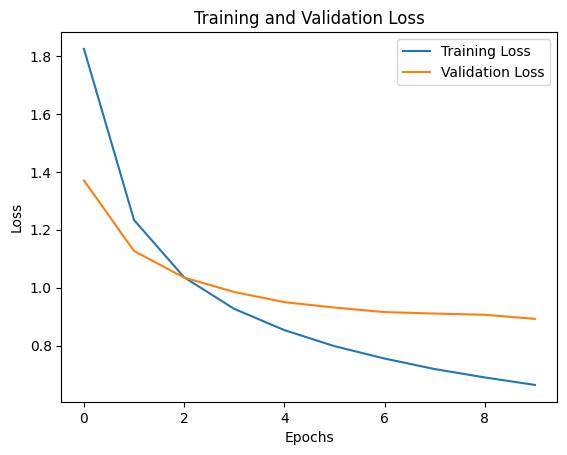

In [ ]:
# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Function to translate sentences
def translate_sentence(input_seq, model, tokenizer_fr, max_len):
    # Generate the decoder input
    target_seq = np.zeros((1, max_len))
    target_seq[0, 0] = tokenizer_fr.piece_to_id('<s>')  # Start token

    translated_sentence = []
    for i in range(max_len - 1):  # Maximum translation length
        # Predict the next word
        predictions = model.predict([input_seq, target_seq], verbose=0)
        next_word_id = np.argmax(predictions[0, i, :])

        # Stop if end token is generated
        if next_word_id == tokenizer_fr.piece_to_id('</s>'):
            break

        # Append the predicted word to the translation
        translated_sentence.append(tokenizer_fr.id_to_piece(int(next_word_id)))
        target_seq[0, i + 1] = next_word_id

    return ' '.join(translated_sentence)

# Output 5 Random Translations
print("\nRandom Translations:")
for _ in range(5):
    idx = random.randint(0, len(test_en) - 1)
    input_seq = np.expand_dims(test_en[idx], axis=0)
    original_fr = ' '.join([sp_fr.id_to_piece(int(token)) for token in test_fr[idx] if token != 0])
    translated_fr = translate_sentence(input_seq, model, sp_fr, max_len)

    print(f"Original EN: {' '.join([sp_en.id_to_piece(int(token)) for token in test_en[idx] if token != 0])}")
    print(f"Original FR: {original_fr}")
    print(f"Translated FR: {translated_fr}\n")



Random Translations:
Original EN: ▁he ▁leaned ▁against ▁the ▁wall .
Original FR: ▁il ▁s ' app uya ▁contre ▁le ▁mur .
Translated FR: ▁contre ▁le ▁mur . <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>

Original EN: ▁they ▁went ▁to ▁the ▁public ▁swimming ▁pool .
Original FR: ▁elles ▁sont ▁allées ▁à ▁la ▁piscine ▁publique .
Translated FR: tr és ▁en ▁ville . <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>

Original EN: ▁i ▁understand ▁perfectly .
Original FR: ▁je ▁comprends ▁parfaitement .
Translated FR: . <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>

Original EN: ▁many ▁eth nic ▁groups ▁tradition ally ▁give ▁money ▁as ▁a ▁wedding ▁gift .
Original FR: hn iques ▁on ▁offre ▁trad iti onne llement ▁de ▁l ' argent ▁en ▁g uise ▁de ▁cadeau ▁de ▁mariage .
Translated FR: cles ▁de ▁l ' argent . <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <

In [ ]:
# Calculate BLEU Score for 20 Sentences
bleu_scores = []
print("\nCalculating BLEU Scores:")
for _ in range(20):
    idx = random.randint(0, len(test_en) - 1)
    input_seq = np.expand_dims(test_en[idx], axis=0)
    reference = [sp_fr.id_to_piece(int(token)) for token in test_fr[idx] if token != 0]
    translated = translate_sentence(input_seq, model, sp_fr, max_len).split()

    # Calculate BLEU score
    bleu_scores.append(sentence_bleu([reference], translated))

# Print Average BLEU Score
average_bleu = np.mean(bleu_scores)
print(f"\nAverage BLEU Score for 20 sentences: {average_bleu:.4f}")


Calculating BLEU Scores:

Average BLEU Score for 20 sentences: 0.0000


In [ ]:
# Function to calculate METEOR score
def calculate_meteor_scores(model, sp_en, sp_fr, test_en, test_fr, num_samples=20):
    meteor_scores = []
    print("\nCalculating METEOR Scores:")
    for _ in range(num_samples):
        # Randomly pick a sentence from the test set
        idx = random.randint(0, len(test_en) - 1)
        input_seq = np.expand_dims(test_en[idx], axis=0)

        # Decode reference and hypothesis as token lists
        reference = [sp_fr.id_to_piece(int(token)) for token in test_fr[idx] if token != 0]
        translated = translate_sentence(input_seq, model, sp_fr, max_len).split()

        # Calculate METEOR score
        meteor_scores.append(meteor_score([reference], translated))

    # Return average METEOR score
    average_meteor = np.mean(meteor_scores)
    return average_meteor

# Calculate METEOR score for 20 sentences
average_meteor = calculate_meteor_scores(model, sp_en, sp_fr, test_en, test_fr, num_samples=20)
print(f"\nAverage METEOR Score for 20 sentences: {average_meteor:.4f}")



Calculating METEOR Scores:

Average METEOR Score for 20 sentences: 0.1237


BPE + Transformer seems to mostly output `<unk>` tokens, possible reasons could be:

*   The model or tokenizer might need more training,
*   A limited vocabulary may fail to represent rare or specific words, resulting in `<unk>`.


## Pre-trained MarianMT

In [ ]:
# Step 1: Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    text = unicodedata.normalize('NFKC', text)  # Normalize accents
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
    text = text.replace(',', '')  # Remove commas
    return text

# Apply Preprocessing
df['en'] = df['en'].apply(preprocess_text)
df['fr'] = df['fr'].apply(preprocess_text)

# Step 2: Train-Test Split
train_data, test_data = train_test_split(df, test_size=0.1, random_state=0)

# Step 3: Convert to Hugging Face Dataset
from datasets import Dataset
train_dataset = Dataset.from_pandas(train_data)
test_dataset = Dataset.from_pandas(test_data)


<ipython-input-48-560506153964>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-560506153964>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Step 4: Load MarianMT Model and Tokenizer
model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Tokenization Function
def tokenize_function(examples):
    inputs = tokenizer(examples['en'], max_length=128, truncation=True, padding="max_length")
    targets = tokenizer(examples['fr'], max_length=128, truncation=True, padding="max_length")
    inputs['labels'] = targets['input_ids']
    return inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set Format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning:

Recommended: pip install sacremoses.



pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Map:   0%|          | 0/158058 [00:00<?, ? examples/s]

Map:   0%|          | 0/17563 [00:00<?, ? examples/s]

In [ ]:
# Step 5: Training Arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=10,
    predict_with_generate=True,
    logging_dir='./logs',
    logging_steps=50,
    report_to="none"  # Disable W&B and other integrations
)

# Step 6: Define Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer  # Keep using tokenizer for now
)

# Step 7: Train Model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead

<ipython-input-50-f32a887fe4cf>:19: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.



Epoch,Training Loss,Validation Loss
1,0.057600,0.050225
2,0.046300,0.045339
3,0.037700,0.043094
4,0.033100,0.042078
5,0.025500,0.041809
6,0.023200,0.042086
7,0.017900,0.042480
8,0.016600,0.043120
9,0.015700,0.043531
10,0.013500,0.043954


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning:

Moving the following attributes in the config to the generation config: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[59513]]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.



TrainOutput(global_step=98790, training_loss=0.030472642378184898, metrics={'train_runtime': 9161.1285, 'train_samples_per_second': 172.531, 'train_steps_per_second': 10.784, 'total_flos': 5.357907763789824e+16, 'train_loss': 0.030472642378184898, 'epoch': 10.0})

In [ ]:
import torch
# Ensure model is on the same device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainer.model.to(device)

# Function to compute BLEU score for a subset of sentences
def compute_bleu_for_subset(trainer, dataset, tokenizer, num_sentences=40, device=device):
    # Randomly sample `num_sentences` indices from the test dataset
    indices = random.sample(range(len(dataset)), num_sentences)

    # Collect predictions and references for the sampled sentences
    sampled_predictions = []
    sampled_references = []

    for idx in indices:
        # Decode the input, reference, and predictions
        input_ids = dataset['input_ids'][idx].unsqueeze(0).to(device)
        labels = dataset['labels'][idx].unsqueeze(0).to(device)

        # Generate predictions for the input
        outputs = trainer.model.generate(input_ids)
        prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
        reference = tokenizer.decode(labels[0], skip_special_tokens=True)

        sampled_predictions.append(prediction)
        sampled_references.append([reference])  # Wrap reference in a list as required by BLEU

    # Compute BLEU score for the sampled subset
    result = metric.compute(predictions=sampled_predictions, references=sampled_references)
    return result['score']

# Compute BLEU score for 40 sentences
bleu_score_40 = compute_bleu_for_subset(trainer, test_dataset, tokenizer, num_sentences=40, device=device)
print(f"BLEU Score for 40 sentences: {bleu_score_40:.2f}")

BLEU Score for 40 sentences: 50.19


In [ ]:
from nltk.translate.meteor_score import meteor_score
import numpy as np
import random

# Function to compute METEOR score
def compute_meteor(predictions, references):
    meteor_scores = []
    for pred, ref in zip(predictions, references):
        pred_tokens = pred.split()
        ref_tokens = ref.split()
        meteor_scores.append(meteor_score([ref_tokens], pred_tokens))
    return np.mean(meteor_scores)

# Randomly select a subset of 40 indices from the test dataset
subset_indices = random.sample(range(len(test_dataset)), 40)

# Extract the subset of the test dataset
subset_test_dataset = test_dataset.select(subset_indices)

# Generate predictions for the subset only
predictions = trainer.predict(subset_test_dataset)

# Decode predictions and references
decoded_preds = tokenizer.batch_decode(predictions.predictions, skip_special_tokens=True)
decoded_refs = tokenizer.batch_decode(subset_test_dataset['labels'], skip_special_tokens=True)

# Compute METEOR score for the subset
meteor_score_result = compute_meteor(decoded_preds, decoded_refs)
print(f"METEOR Score for 40 sentences: {meteor_score_result:.4f}")

# Output 5 Random Translations with METEOR Scores
print("\nSample Translations with METEOR Scores:")
for _ in range(5):
    idx = random.randint(0, len(decoded_preds) - 1)
    original_en = tokenizer.decode(subset_test_dataset['input_ids'][idx], skip_special_tokens=True)
    original_fr = tokenizer.decode(subset_test_dataset['labels'][idx], skip_special_tokens=True)
    translated_fr = decoded_preds[idx]

    # Tokenize for METEOR
    original_fr_tokens = original_fr.split()
    translated_fr_tokens = translated_fr.split()

    # Calculate METEOR for this sentence
    single_meteor_score = meteor_score([original_fr_tokens], translated_fr_tokens)

    print(f"Original (EN): {original_en}")
    print(f"Original (FR): {original_fr}")
    print(f"Translated (FR): {translated_fr}")
    print(f"METEOR Score: {single_meteor_score:.4f}")
    print("-" * 50)


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Tr

METEOR Score for 40 sentences: 0.7071

Sample Translations with METEOR Scores:
Original (EN): nothing is going to happen.
Original (FR): rien ne va se passer.
Translated (FR): rien ne va se passer.
METEOR Score: 0.9960
--------------------------------------------------
Original (EN): do you really think tom is better than i am?
Original (FR): penses-tu vraiment que tom est meilleur que moi ?
Translated (FR): penses-tu vraiment que tom est meilleur que moi ?
METEOR Score: 0.9993
--------------------------------------------------
Original (EN): who told you the story?
Original (FR): qui vous a raconté l'histoire ?
Translated (FR): qui t'a conté l'histoire ?
METEOR Score: 0.4331
--------------------------------------------------
Original (EN): i'm economically independent of my parents.
Original (FR): je suis financièrement indépendant de mes parents.
Translated (FR): je suis économiquement indépendant de mes parents.
METEOR Score: 0.8413
--------------------------------------------------

Pre-trained MarianMT performs much better than the previously trained models.

**Pre-trained MarianMT** significantly outperforms the custom-trained models for several reasons:

1. **Extensive Training Data**:
   - MarianMT is trained on millions of parallel sentence pairs from large multilingual datasets like OPUS and WMT. These datasets include a diverse range of text types, styles, and domains, making the model robust and versatile.
   - In contrast, the previous model were trained on a small dataset, which is insufficient for learning complex linguistic patterns and generalizing to unseen data.

2. **Efficient Tokenization with SentencePiece**:
   - MarianMT employs **SentencePiece tokenization**, which effectively handles out-of-vocabulary (OOV) words by splitting rare or unknown words into subword units. This reduces issues with unseen vocabulary and improves translation quality.

3. **Comprehensive Pre-training**:
   - The MarianMT model has been pre-trained for weeks or months on high-performance GPUs or TPUs, with optimized hyperparameters and architecture. This ensures the model captures intricate language structures and dependencies.
   - Training a custom model from scratch on limited computational resources and a small dataset cannot achieve the same level of sophistication.

4. **Time and Resource Efficiency**:
   - Developing a high-quality NMT model from scratch requires extensive time, computational resources, and expertise. MarianMT allows skipping this costly training phase, providing a pre-trained model that is ready for use or fine-tuning.

5. **Robust Generalization**:
   - MarianMT generalizes well to various input styles, dialects, and text domains due to its comprehensive training dataset.


6. **High-Quality Out-of-the-Box Performance**:
   - MarianMT delivers high-quality translations without extensive customization or fine-tuning, making it especially valuable when quick and accurate translations are required.


By leveraging the strengths of pre-trained models like MarianMT, it is possible to achieve superior translation quality, scalability, and efficiency. It highlights the importance of large-scale pre-training and robust tokenization in achieving state-of-the-art performance.


# Conclusion

This work is limited by in time constraints and computational power during traing. Despite this, some conclusions an be learned from it.

1. The notebook is not restricted to one paradigm but covers:

*   Classical (SMT),
*   Neural (LSTM, Transformer)
*   Pretrained (MarianMT)

These show an understanding of the evolution and comparative advantages of MT techniques.

2. Comprehensive Preprocessing Steps
Each model's preprocessing pipeline is designed to suit its requirements:

*   Cleaning and Normalization: Lowercasing, removing unwanted characters, and normalizing text.
*   Tokenization: Tailored to the model type (e.g., BPE for Transformers, sequential tokenization for LSTMs).
*   Padding: Ensures uniform input lengths for batch processing in neural models.
This highlights the importance of tailoring preprocessing to the model's architecture to optimize training and performance.


3. SentencePiece for BPE: Indicates scalability in vocabulary management, which is critical for large corpora.

4. Pretrained Models: Demonstrates practical use of resources like MarianMT and Hugging Face datasets, allowing efficient experimentation and deployment.


**Recommendations for Further Work**
Add More Evaluation Metrics: Include metrics like TER (Translation Error Rate) or chrF to cover diverse evaluation aspects.

Error Analysis: Introduce a section for analyzing common translation errors (e.g., alignment issues in SMT or context errors in NMT).

**Note:** A big challenge of translating from English to French is that the words in french have gender, and don't in English. So translating to English would be a simpler projet.